In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model



In [3]:
df = pd.read_csv("final data/database_web_86.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df.drop_duplicates(keep='first', inplace=True)
# df.shape
df.shape


(86, 14)

In [4]:
df.columns

Index(['Job Title', 'Annual Salary', 'Experience', 'Education', 'Is Remote',
       'Company Size Scale', 'Company Old', 'Revenue Scale', 'Rating',
       'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work Life Balance'],
      dtype='object')

# Starting the ML process

In [5]:
df_copy = df.copy()
var1 = 'Experience'
var2 = 'Education'
var3 = 'Is Remote'
var4 = 'Company Size Scale'
var5 = 'Rating'
df = df[df['Experience'] < 12]
df_copy = df_copy[df_copy[var1] != -1]
df_copy = df_copy[df_copy[var2] != -1]
df_copy = df_copy[df_copy[var3] != -1]
df_copy = df_copy[df_copy[var4] != -1]
df_copy = df_copy[df_copy[var5] != -1]

predict = 'Annual Salary'
data = df_copy[[predict, var1, var2, var3, var4, var5]]

X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

C:\Users\avich\AppData\Local\Temp\ipykernel_18320\1184239686.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1))


# Training section

In [6]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(f"acc = {acc}")
print(f"Coefficient: {linear.coef_}\n"
      f"Intercept: {linear.intercept_}")

acc = 0.1539774059542809
Coefficient: [ -131.12430821 15893.43059648 19345.34692033  -600.50703423
  5757.97258992]
Intercept: 54527.343073131626


# Using the model to predict data about new students

In [7]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(f"Model prediction: {predictions[x]}      The input values: {x_test[x]}        The actual value: {y_test[x]}")

Model prediction: 132541.47850036976      The input values: [1.  2.  1.  2.  4.9]        The actual value: 130000.0
Model prediction: 91516.20413774686      The input values: [10.   1.   0.   2.   4.1]        The actual value: 70000.0
Model prediction: 89003.94698720792      The input values: [20.   1.   0.   4.   4.1]        The actual value: 70000.0
Model prediction: 90393.13387565446      The input values: [1.  1.  0.  2.  3.7]        The actual value: 135200.0
Model prediction: 92855.91794644267      The input values: [8.  1.  0.  5.  4.6]        The actual value: 119600.0


# Saving the model
### In real-life, it takes a lot of time and resources to train a model. In that case, it is crustal to know how to save it for the next ues
### We will use 'pickle' for this job

In [8]:
import pickle
with open('studentModel.pickle', 'wb') as f:  # writing in binary mood
    pickle.dump(linear, f)

pickle_in = open('studentModel.pickle', 'rb')
linear = pickle.load(pickle_in)

# Improving the model
We will keep one line of the initialization outside the for loop, because we will need them for other porpoises late.
The idea is to run in 'for' loop and keep the same logic, each iteration of the model will have different values **because they are split randomly.**
Each iteration of the model will update the file only if the acc score is better.


In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)
best = 0

for _ in range(7000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)


    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)

    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
        print(f"The best so for! {best}")
        with open('studentModel.pickle', 'wb') as f:
            pickle.dump(linear, f)

print(f"The final ACC = {best}")



0.13345180551738267
The best so for! 0.13345180551738267
-0.1995008062123591
-0.508114398136831
-0.14584834512727496
-0.277570594721102
0.06296653434291244
0.23933941346922105
The best so for! 0.23933941346922105
0.36668432894575054
The best so for! 0.36668432894575054
-1.615831802713359
-0.7397222947105548
0.24785023469773315
-0.7486458323155056
0.6833961108705902
The best so for! 0.6833961108705902
0.353489686170788
-24.14650089383956
-1.4683424166366477
-1.4083795630694596
-0.2408957862297625
0.5073665882433811
0.08407000336368675
-1.9648450624750167
0.4334067449083807
0.13588845034190167
-0.451100165067976
-0.44985306369497136
0.17809261726745407
-0.9362628857663045
0.24017306913451597
-0.34504809666496383
0.4573264775240846
-1.1643689688649164
-0.6921170867040334
0.22927945800621674
-0.4473456799806559
-0.6047450105324039
-0.200318053932383
-42.22508710955318
-0.45992069175837047
-0.2508745950031628
-0.532792684446862
-0.6026380155844497
-1.4948507842510854
-2.207250135735743
0.02

# Visualized the data
### Here we will see how to analyst the corrections between two variables

In [10]:
import  matplotlib.pyplot as pyplot
from matplotlib import style


Text(0, 0.5, 'Annual Salary')

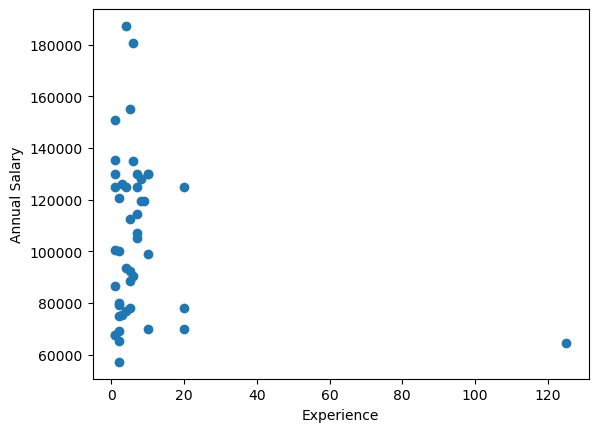

In [11]:
p = var1
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

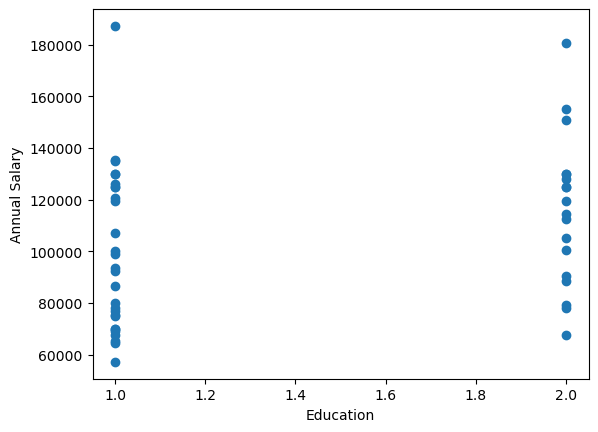

In [12]:
p = var2
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

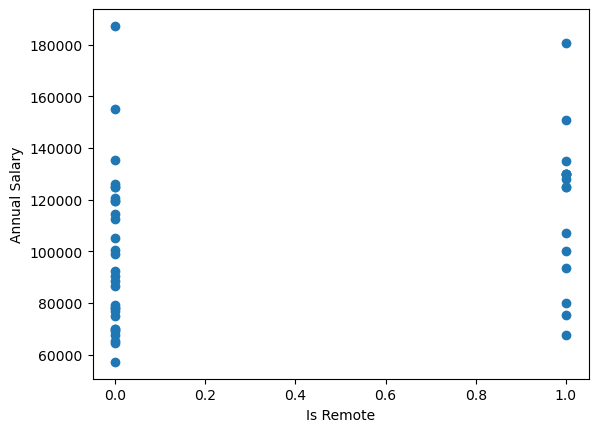

In [13]:
p = var3
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

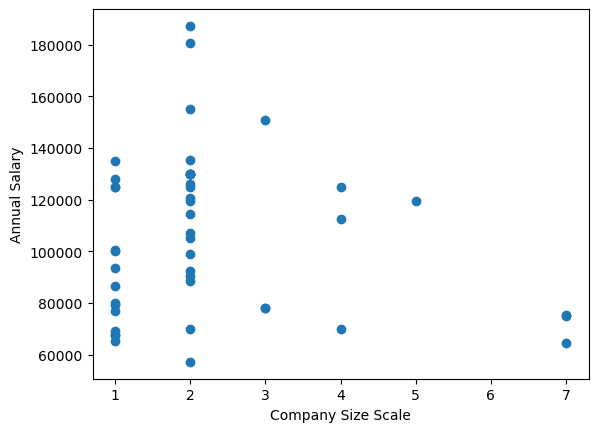

In [14]:
p = var4
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')
